In [ ]:
!kaggle datasets download sai14karthik/nasdq-dataset

Dataset URL: https://www.kaggle.com/datasets/sai14karthik/nasdq-dataset
License(s): apache-2.0
  0% 0.00/126k [00:00<?, ?B/s]
100% 126k/126k [00:00<00:00, 73.5MB/s]


In [ ]:
!unzip /content/nasdq-dataset.zip

Archive:  /content/nasdq-dataset.zip
  inflating: nasdq.csv               


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/nasdq.csv')
df.head()

,Date,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,TEDSpread,EFFR,Gold,Oil
0,2010-01-04,6.640000,6.810000,6.633333,6.746667,6514500.0,0.11,1.4419,20.04,0.17,0.12,1117.699951,81.510002
1,2010-01-05,6.643333,6.773333,6.643333,6.766667,4445100.0,0.11,1.4402,19.35,0.18,0.12,1118.099976,81.769997
2,2010-01-06,6.733333,6.786667,6.720000,6.763333,7340100.0,0.11,1.4404,19.16,0.19,0.12,1135.900024,83.180000
3,2010-01-07,6.750000,6.766667,6.630000,6.673333,8498400.0,0.11,1.4314,19.06,0.20,0.10,1133.099976,82.660004
4,2010-01-08,6.676667,6.766667,6.626667,6.743333,4347600.0,0.11,1.4357,18.13,0.20,0.11,1138.199951,82.750000


In [ ]:
print(df.describe())
print('-----------------------------------------')
print(df.info())
print('-----------------------------------------')
print(df.isnull().sum())

              Open         High          Low  ...         EFFR         Gold          Oil
count  3914.000000  3914.000000  3914.000000  ...  3914.000000  3914.000000  3914.000000
mean     29.218649    29.491567    28.943843  ...     1.189384  1531.077030    72.019456
std      19.669386    19.840919    19.486496  ...     1.684429   330.904451    21.470288
min       5.820000     5.916667     5.726667  ...     0.040000  1050.800049   -37.630001
25%      10.995000    11.101667    10.890000  ...     0.090000  1257.425018    53.185000
50%      23.708333    23.858334    23.575001  ...     0.190000  1422.049988    73.465000
75%      47.375001    47.807499    46.804999  ...     1.700000  1778.574982    89.877499
max      75.599998    75.680000    74.050003  ...     5.330000  2760.800049   123.699997

[8 rows x 12 columns]
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3914 entries, 0 to 3913
Data columns (total 13 columns):
 #   Column        Non-Null

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

Text(0.5, 0, 'Date')

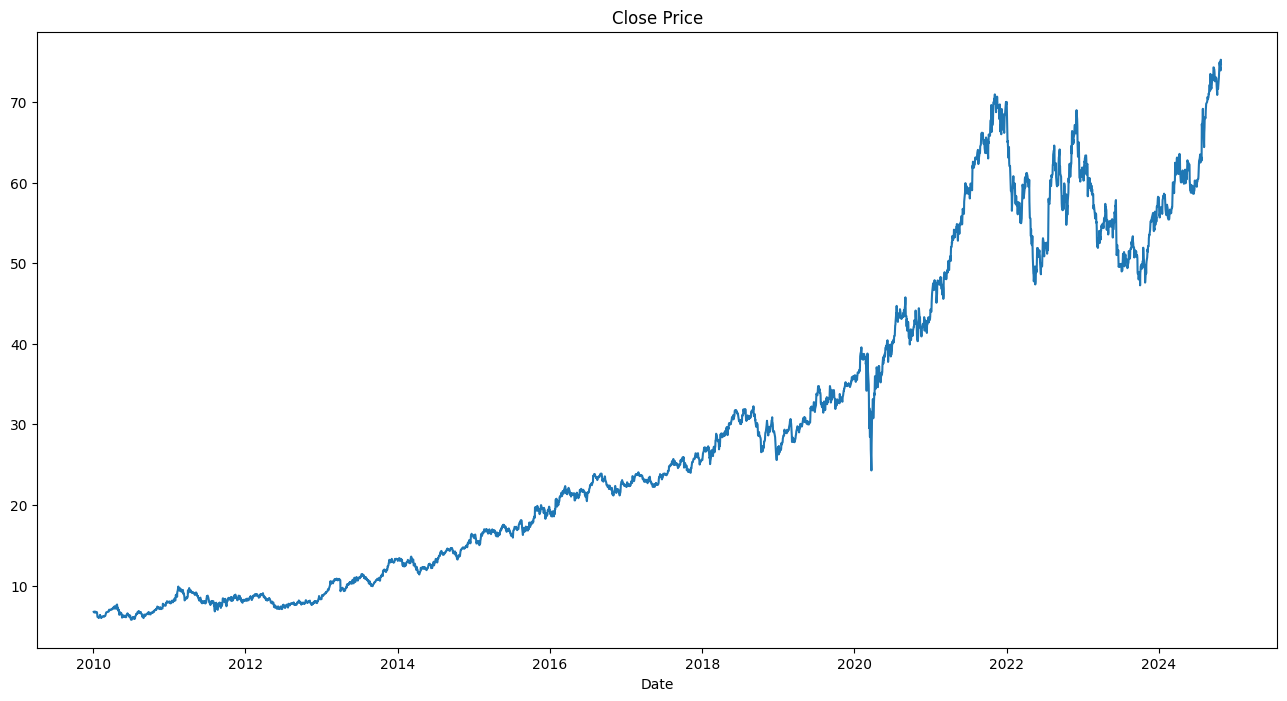

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(df['Date'], df['Close'])
plt.title('Close Price')
plt.xlabel('Date')

In [ ]:
df['ma10'] = df['Close'].rolling(10).mean()
df['ma50'] = df['Close'].rolling(50).mean()
df['ma200'] = df['Close'].rolling(200).mean()
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close']),

                go.Scatter(x = df['Date'],
                           y = df['ma10'])
                ])

fig.show()

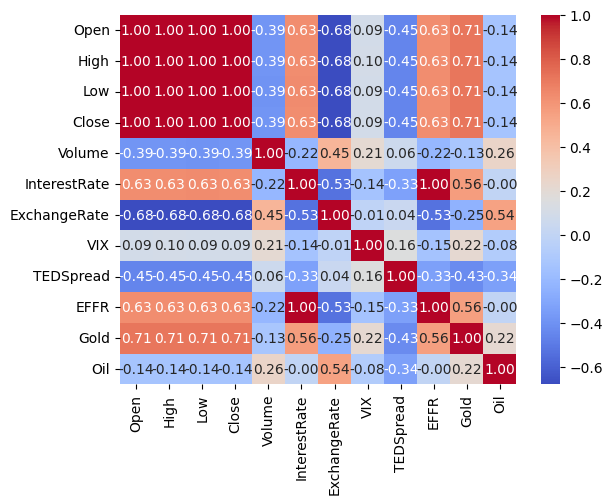

In [ ]:
num_df = df.select_dtypes(include = ['float64', 'int64'])
correlation = num_df.corr()
sns.heatmap(correlation, annot=True, cmap = 'coolwarm', fmt = '.2f')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = num_df.drop(['Open','High','Low','Close'], axis = 1)
y = num_df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model_fit = model.fit(X_train, y_train)
Y_pred = model_fit.predict(X_test)

In [ ]:
print(mean_squared_error(y_test, Y_pred))
print(r2_score(y_test, Y_pred))

63.963385469661816
0.8391141308957013
